In [55]:
# working on a data set
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
import scipy,scipy.stats
from statsmodels.api import add_constant #add constant will create the line intercept and ensures it works normally
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
wine=pd.read_csv('wine.csv')
wine.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


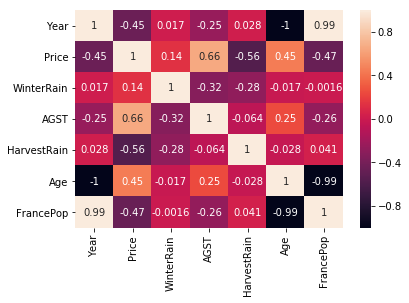

In [8]:
sns.heatmap(wine.corr(),annot=True)
plt.show()

In [94]:
x=wine.iloc[:,[2,3,4,5]]
y=wine['Price']
x2=add_constant(x)
lm=sm.OLS(y,x2)
lm=lm.fit()

In [95]:
print(lm.summary()) #r-squared value should be high

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     24.17
Date:                Fri, 28 Dec 2018   Prob (F-statistic):           2.04e-07
Time:                        15:02:54   Log-Likelihood:                -2.1622
No. Observations:                  25   AIC:                             14.32
Df Residuals:                      20   BIC:                             20.42
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.4300      1.766     -1.942      

In [82]:
wine=pd.get_dummies(wine,drop_first=True)
wine.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


In [83]:
x=wine.iloc[:,[2,3,4,5]]
y=wine['Price']


In [84]:
lreg=LinearRegression()
lreg.fit(x,y)
print('b0=',lreg.intercept_)
print('b1,b2,...=',lreg.coef_)

b0= -3.4299801869286615
b1,b2,...= [ 0.00107551  0.60720935 -0.00397153  0.02393083]


In [85]:
y_predict=lreg.predict(x)
y_predict

array([7.71515356, 7.87293687, 7.67732765, 7.00335549, 7.01993151,
       7.53932616, 6.75766829, 8.363191  , 7.51318707, 6.63028304,
       7.56029312, 5.91863325, 7.55530516, 7.10919438, 6.26214399,
       6.60372738, 7.31679442, 7.18587836, 5.88022723, 7.0882792 ,
       6.56948742, 6.9897216 , 6.9233729 , 6.71339661, 6.91178436])

In [86]:
tss=sum((y-np.mean(y))**2)
tss

10.1506377256

In [87]:
sse=((y-y_predict)**2).sum()
sse

1.7401622013849831

In [88]:
r2=1-(sse/tss)
r2

0.8285662193424282

In [91]:
#this has to be done in the beginning of the procedure
vif = pd.DataFrame()
x=wine.iloc[:,[2,4,5]]
vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,6.414938,WinterRain
1,3.871517,HarvestRain
2,5.282313,Age
